<a href="https://colab.research.google.com/github/HectorLP98/Machine_Learning/blob/main/Algorithms_Basics_M_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Core Learning Algorithms

Estudiaremos los 4 algoritmos basicos de M.L y aplicaremos cada uno de esots algoritmos antes de resaltar cada uno de sus usos

The algortihms we will focus on include:<br>
- Linear Regression <br>
- Classification <br>
- Clustering <br>
- Hidden Markov Models <br>

Vale la pena señalar que TensorFlow incluye muchas herramientas para solucionar problemas, a continuacion he seleccionado las herramientas mas importantes y faciles de usar.

# Linear Regression
En esta seccion se usara un modelo  de regresion para predecir el numero de pasajeros sobrevivientes  en el dataset del titanic.

Esta seccion esta basada en las siguiente documentacion: https://www.tensorflow.org/tutorials/estimator/linear 


### How it Works
Antes de sumergirnos en el dataset titanic vamos a ver una explicacion muy superficial de como funciona el algoritmo de regresion lineal. Este es usado si los datos tienen una relacion casi lineal, se puede generar una linea que aproxime puntos para el futuro.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf



In [ ]:
!pip install -q sklearn

### Data
La parte mas importante para M.L es la preparacion de los datos,

El dataset que vamos a utilizar conitiene la informacion personal de cada uno de los pasajeros en el titanic. Nuestro primer paso es entender los datos y explorarlos.

In [ ]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


Explorando los datos de entrenamiento.

In [ ]:
y_train.describe(), y_eval.describe()

(count    627.000000
 mean       0.387560
 std        0.487582
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        1.000000
 max        1.000000
 Name: survived, dtype: float64, count    264.000000
 mean       0.375000
 std        0.485042
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        1.000000
 max        1.000000
 Name: survived, dtype: float64)

In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
dftrain.shape

(627, 9)

Ahora vamos a ver algunas graficas de nuestros datos, esto nos dara una intuicion mas grande de como se relacionan los datos con nuestra variable objetivo: " survived".


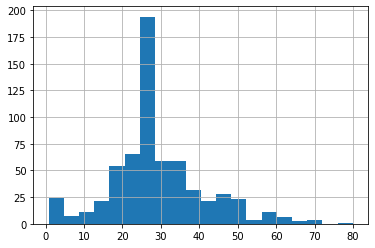

In [ ]:
dftrain.age.hist(bins=20)

Podemos observar que la mayoria de los pasajeros tenian entre 20 y 38 años.

Ademas las personas que estan entre los 20 podrian generar un sesgo en el modelo.

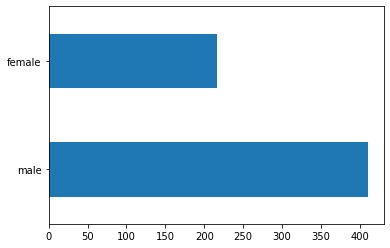

In [ ]:
dftrain.sex.value_counts().plot(kind=)

Observamos que la mayor parte de los pasajeros eran hombres.

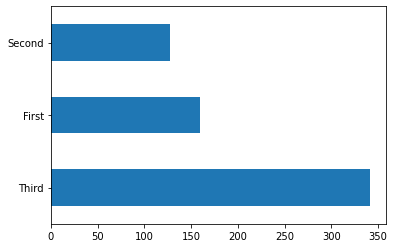

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

Notamos que la mayor parte de los pasajeros tenian un boleto de 3ra clase, y los mas escasos eran los de 2da clase.

Text(0.5, 0, '% survive')

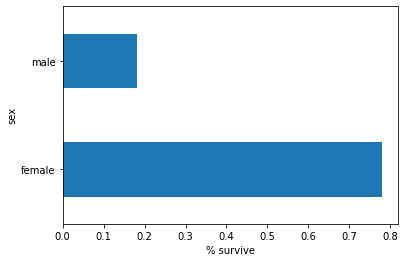

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

La mayor parte de las personas que sobrevivieron fueron mujeres, y como habian menos mujeres que hombres, podemos inferir con mucha certea que las mujeres tienen mas probabilidad de sobrevivir que un hombre.

### Training vs Testing Data

Para entrenar modelos necesitamos dos sets de datos diferentes: **Los datos de entrenamiendo y los datos de prueba**. <br>

Los datos training (entrenamiento) se usan para entrenar el modelo y suelen ser mucho mas grandes que los datos de validacion (testing). <br>

Los datos testing se usan para revisar la performancia del modelo y evaluar dicho modelo.
Usaremos datos diferentes de con los que se entreno el modelo. ¿Puedes pensar el porque de esto?. <br>

Bueno, el punto de hacer modelos es hacer predicciones para nuevos datos que nunca ha visto antes. Con el testing data probamos datos que el modelo no ha visto y como nosotros no estamos seguros que el modelo no memoriza los valores de entraniemnto es por eso que necesitamos 2 datos diferentes (testing and training).

### Feature Columns
En nuestro dataset tenemos dos tipos diferentes de informacion, Categoricos y Numericos. <br>

Nuestros datos categoricos son todos aquellos que no son numericos, por ejemplo el sexo de los pasajeros que son 'male' and 'female'. <br>

Antes de seguir adelante con el entrenamiento de los modelos debemos hacer estos datos numericos, ejemplo: 'male = 1', 'female = 2', aunque no necesariamente debe tener este orden o esos numeros. <br>

afortunadamente TensorFlow tiene lo necesario para ayudarnos.



In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_column = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_column.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_column.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_column)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

Esencialmente lo que estamos haciendo aqui estamos creando un lista de features que estan en nuestro dataset. <br>

Las lineas de codigo dentro del metodo append() lo que hacen es crear un objeto que nuestro modelo puede usar para mapear  valores cadena como  'male' and 'female' y convertirlas en enteros. Esto nos evita codificar dichos valores manualmente.<br>

Aqui hay algo de documentacion complementaria:
https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list

https://www.tensorflow.org/api_docs/python/tf/feature_column

### EL proceso de entrenamiento
Casi hemos terminado de preparar nuestros datos asi que es buen momento para explicar como entrenar nuestro modelo. Especificamente como alimentar los datos de entrada de nuestro modelo. <br>
Para este modelo específico, los datos se transmitirán en él en pequeños lotes de 32. Esto significa que no ingresaremos todo el conjunto de datos a la vez, mas bien ingresaremos pequeños lotes. <br>
Realmente alimentaremos a nuestro modelo con estos lotes de acuerdo al numero de epochs (epocas).

Un epoch (epoca) es simplemente un flujo de entreda de nuestro modelo. El numero de epochs que definimos es la cantidad de veces que nuestro modelo vera el conjunto de datos.Usamos multiples epochs (epocas) con la esperanza de que despues de ver el mismo dataset muchas veces, el modelo determinara mejor como estimar los datos. <br>
Ejem; si le damos 10 epochs nuestro modelo vera el mismmo dataset 10 veces. <br>

Ya que necesitamos alimentar nuestros datos en lotes y hacerlo multiples veces, necesitamos crear algo llamado una **funcion de entrada**. The input function simplemente define como nuestro dataset se convertira en lotes en cada epoca. <br>

En otras palabras, le pasaremos lotes de muestras diferentes sin repeticion en cada epoch.



### Funcion de entrada (Input function)

El modelo TensorFlow que vamos a usar requiere que los datos seas pasados viniendo del objeto *tf.data.Dataset*. Esto significa que debemos crear una funcion de entrada que convierta nuestro pandas dataframe en ese objeto. <br>

A bajo encontrar una funcion de entrada aparentemente complicada, esta es extraida de la documentacion de TensorFlow: https://www.tensorflow.org/tutorials/estimator/linear<br>

La input_function especifica cómo se convierten los datos en un tf.data.Dataset que alimenta la canalización de entrada en forma de transmisión. tf.data.Dataset puede admitir múltiples fuentes, como un marco de datos, un archivo con formato csv y más.

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

### Creando el modelo.
En este tuto, vamos a usar el modelo de regression lineal.
Crearlo es de hecho muy facil y bello!! Mira la celda a continuacion.

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_column)

# Creamos un estimador linear pasando las columnas features que previamente habiamos creado.

### Entrenando el modelo.
Entrenar el modelo tambien es demasiado sencillo, debemos pasar el output de la input function que ya hemos creado.

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

In [ ]:
# Hacer la prediccion.
result = list(linear_est.predict(eval_input_fn))
print('Datos del pasajero i-esimo', dfeval.loc[2])
print('Valor real del pasajero i-esimo', y_eval.loc[2])
print('Prediccion; probabilidad de (no sobrevive, sobrevive)', result[2]['probabilities'])

### Columnas de funciones derivadas
Ahora alcanzaste una precisión del 75%. El uso de cada columna de características base por separado puede no ser suficiente para explicar los datos. Por ejemplo, la correlación entre la edad y la etiqueta puede ser diferente para diferentes géneros. Por lo tanto, si solo aprende un peso de modelo único para gender="Male" y gender="Female" , no capturará todas las combinaciones de edad y género (por ejemplo, distinguir entre gender="Male" AND age="30" AND gender="Male" Y age="40" ).

Para conocer las diferencias entre las diferentes combinaciones de características, puede agregar columnas de características cruzadas al modelo (también puede clasificar la columna de edad antes de la columna cruzada):

In [ ]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)

Después de agregar la función de combinación al modelo, entrenemos el modelo nuevamente:

In [ ]:
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

# Clasificador
Ya que hemos cubierto la regresion lineal, es tiempo  de hablar de la clasificación. La regesión lineal fue usada para estimar un valor numerico real, la clasificación es usada para separar puntos de datos en  diferentes etiquetas (labels). En este ejemplo vamos a usar un estimador TensorFlow para clasificar flores.

La siguiente seccion esta basada en la guia de la pagina web de TensorFlow: 

https://www.tensorflow.org/tutorials/estimator/premade

In [ ]:
import pandas as pd 
import tensorflow as tf

### El conjunto de datos
El programa de ejemplo de este documento crea y prueba un modelo que clasifica las flores de iris en tres especies diferentes según el tamaño de sus sépalos y pétalos .

Entrenará un modelo utilizando el conjunto de datos de Iris. El conjunto de datos de Iris contiene cuatro características y una etiqueta . Las cuatro características identifican las siguientes características botánicas de las flores individuales de Iris:

longitud del sépalo <br>
anchura del sépalo <br>
longitud del pétalo <br>
ancho de pétalo <br>

En función de esta información, puede definir algunas constantes útiles para analizar los datos:

In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

A continuacion se descargan los datasets.

In [ ]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")



16384/573 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [ ]:
train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [ ]:
# Inspeccionamos los datos
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


Ahora quitamos la columna objetivo  de cada dataset respectivamente sera 'Species' feature

In [ ]:
train_y = train.pop('Species')
test_y = test.pop('Species')

# The label column has now been removed from the features.
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [ ]:
train.shape, test.shape  #120 y 30 registros respectivamente.

((120, 4), (30, 4))

### Input function
Becesitamos crear otra funcion de entrada aqui, afortunadamente para nosostros esoto es muy facil de hacer. <br>

Debe crear funciones de entrada para proporcionar datos para el entrenamiento, la evaluación y la predicción.

Una función de entrada es una función que devuelve un objeto tf.data.Dataset que genera la siguiente tupla de dos elementos:

- features : un diccionario de Python en el que:

> Cada tecla es el nombre de una función.

> Cada valor es una matriz que contiene todos los valores de esa característica.

- label : una matriz que contiene los valores de la etiqueta para cada ejemplo.

Solo para demostrar el formato de la función de entrada, aquí hay una implementación simple:

In [ ]:
def input_evaluation_set():
    features = {'SepalLength': np.array([6.4, 5.0]),
                'SepalWidth':  np.array([2.8, 2.3]),
                'PetalLength': np.array([5.6, 3.3]),
                'PetalWidth':  np.array([2.2, 1.0])}
    labels = np.array([2, 1])
    return features, labels

Su función de entrada puede generar el diccionario de features y la lista de label de la forma que desee. Sin embargo, se recomienda usar la API de conjunto de datos de TensorFlow, que puede analizar todo tipo de datos.

La API de conjunto de datos puede manejar muchos casos comunes por usted. Por ejemplo, con la API de conjunto de datos, puede leer fácilmente registros de una gran colección de archivos en paralelo y unirlos en una sola secuencia.

Para simplificar las cosas en este ejemplo, cargará los datos con pandas y creará una canalización de entrada a partir de estos datos en memoria:

In [ ]:
def input_fn(features, labels, training=True, batch_size=256):
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)

### Feature Columns (columnas caracteristicas)
Una columna de características es un objeto que describe cómo el modelo debe usar los datos de entrada sin procesar del diccionario de características. Cuando crea un modelo de Estimator, le pasa una lista de columnas de características que describen cada una de las características que desea que use el modelo. El módulo tf.feature_column proporciona muchas opciones para representar datos en el modelo.

Para Iris, las 4 características sin procesar son valores numéricos, por lo que creará una lista de columnas de características para indicarle al modelo Estimator que represente cada una de las cuatro características como valores de coma flotante de 32 bits. Por lo tanto, el código para crear la columna de características es


In [ ]:
my_feature_columns = []
for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))

print(my_feature_columns)

SepalLength
SepalWidth
PetalLength
PetalWidth
[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


Las columnas de características pueden ser mucho más sofisticadas que las que se muestran aquí. Puede leer más sobre las columnas de características en esta guía .

Ahora que tiene la descripción de cómo quiere que el modelo represente las características sin procesar, puede construir el estimador.

### Construyendo el modelo.
El problema de Iris es un problema de clasificación clásico. Afortunadamente, TensorFlow proporciona varios Estimadores clasificadores prefabricados, que incluyen:

>***tf.estimator.DNNClassifier***    para modelos profundos que realizan clasificación multiclase. Red Neuronal

>**tf.estimator.DNNLinearCombinedClassifier**      para modelos amplios y profundos.

>***tf.estimator.LinearClassifier***  para clasificadores basados ​​en modelos lineales.

Para el problema de Iris, tf.estimator.DNNClassifier parece ser la mejor opción. Así es como creaste una instancia de este Estimador:

In [ ]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    # REd neuronal con 2 capas  con  30 nodos y 10 nodos ocultos
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=3)

### Entranar el modelo

In [ ]:
# Train the Model.
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=9000)

Instructions for updating:
Use standard file utilities to get mtimes.


Tenga en cuenta que envuelve su llamada input_fn en una lambda para capturar los argumentos mientras proporciona una función de entrada que no toma argumentos, como lo espera el Estimador. El argumento de steps le dice al método que detenga el entrenamiento después de una serie de pasos de entrenamiento.

### Evaluacion del modelo
Ahora que el modelo ha sido entrenado, puede obtener algunas estadísticas sobre su rendimiento. El siguiente bloque de código evalúa la precisión del modelo entrenado en los datos de prueba:

In [ ]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.967



El diccionario eval_result también contiene la average_loss promedio (pérdida media por muestra), la loss (pérdida media por mini-lote) y el valor del paso global del global_step (el número de iteraciones de entrenamiento a las que se sometió).

### Hacer predicciones (inferir) a partir del modelo entrenado
Ahora tiene un modelo entrenado que produce buenos resultados de evaluación. Ahora puede usar el modelo entrenado para predecir la especie de una flor de iris en función de algunas medidas no etiquetadas. Al igual que con el entrenamiento y la evaluación, haces predicciones usando una sola llamada de función:

In [ ]:
from tensorflow.python.ops.gen_array_ops import inplace_update
def input_fn(features, batch_size=256):
  # convierte los inputs del dataset en etiquetas.
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print('Porfavor escribe el numero de la medida correspondiente.')

for feature in features:
  valid = True
  while valid:
    val = input((feature + ": "))
    if not val.isdigit(): valid = False
  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda : input_fn(predict))

for pred_dict in predictions:
  class_id = pred_dict['class_ids'][0]
  proba = pred_dict['probabilities'][class_id]

  print('Prediccion es "{}" ({:.1f}%))'.format(SPECIES[class_id], 100*proba))


Porfavor escribe el numero de la medida correspondiente.
SepalLength: 1.8
SepalWidth: 2.1
PetalLength: 3.1
PetalWidth: 3.5
Prediccion es "Virginica" (89.9%))


# Clustering

Clustering es una tecnica de machine learning que envuelve grupo de datos. En teoria, los puntos de datos que están en el mismo grupo deben tener propiedades y caracteristicas similares, mientras que los puntos de datos en grupos diferentes deben tener otras propiedades y caracteristicas.
Fuente: <br>
https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68 <br>

Desafortunadamente, hay problemas con la versión actual de Tensorflow y la implementacion para KMeans. Esto significa que no podemos usar KMeans sin escreibir el algoritmo de forma scratch (Sintaxis Los scripts de scratch algoritmos se edifican encajando bloques que representan afirmaciones, expresiones y construcciones de control, puede ver mas en https://todoscratch.com/scratch-algoritmos/)
todavía no estamos en ese nivel, así que solo explicaremos los conceptos básicos de la agrupación en clústeres por ahora.

### Algoritmo basico para k-means
* Step 1: Elige puntos al azar para colocar k-centroides. <br>

* Step 2: Asigna todos los puntos de datos a los centroides por la distancia. La distancia mas cercana al punto con un centroide, sera la que se asigne.

* Step 3: Ahora promedias todos los puntos asignados a cada centroide para encontrar la mitad de ese cluster (***centro de masa***). Para colocar el centroide en esa posicion.

* Sept 4: Reasigna cada punto una vez mas al centroide mas cercano 

* Step 5: Repite pasos 3-4 hasta que los puntos ya no cambien de centroide.

# Hidden Markov Models (Modelos ocultos de Markov)

Los modelos ocultos de Markov es conjunto finito de estados, cada uno de estos esta asociado con una (generalmente multidimensional) distribucion de probabilidad. Las transiciones entre los estados se rigen por un conjunto de probabilidades llamadas probabilidades de transicion. (http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html) <br>

Un modelo oculto de markov trabaja con probabilidades para predecir eventos o estados futuros. En esta seccion nosotros aprenderemos como crear un modelo oculto de MArkov que pueda preecir el tiempo.

this section is based on the following TensorFlow tutorial: <br>
https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel

## Data
Vamos a empezar discutiendo el tipo de datos que usaremos cuando trabajemos con un modelo oculto de Markov.

En la seccion anterior trabajamos con grandes conjuntos de entrada. Para un modelo de Markov nosotros solo estamos interesados en la distribucion de probabilidad que tiene que ver con los estados.

Podemos encontrar esas probabilidades de conjunto de datos grande o tal vez ya tengamos estos valores. Repasaremos un ejemplo en un segundo que aclara algunas cosas, pero discutamos los componentes de un modelo de Markov.

*** STATES ***: En cada modelo de Markov tenemos un conjunto finito de estados. Estos estados pueden ser cosas como {'calido' , 'frio'}  o bien {'rojo', 'verde', 'azul', etc}. Estos estados estan ocultos en el modelo. Esto significa que no los observamos directamente.

***Observaciones*** : Cada estado tiene un resultado observado asociado con este basado en distribucion de probabilidad (La probabilidad de que suceda cada estado). Un ejemplo de esto es el siguiente: En un dia caluroso hay un 80% de probabilidad de estar feliz y un 20% de estar triste.

***Transicion*** : Cada estado tendra una probabilidad definidad a una probabilidad que define la probabilidad de transición a un estado diferente (la probabilidad de estar en i y pasar a j). Un ejemplo es el siguiente: En un dia firo, hay un 30% de chance de que el siguiente sea caluroso y un 70% de chace de tener otro dia frio.

Para crear un modelo de Markov necesitamos: <br>
* States <br>
* Distribucion de las observaciones <br>
* Distribucion de las transiciones. <br>
<br>
<br>

Para nuestro proposito asumiremos que ya tenemos esta informacion mientras intentamos predecir el tiempo (clima) en un dia dado.

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow_probability as tfp 
import tensorflow as tf 

### Modelo del tiempo
Tomado directamente de la documentacion de TensorFlow: <br>
https:www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel <br>

Modelaremos un sistema meteorologico sencillo e intentaremos predecir la temperatura en cada dia dado la siguiente información.

1. Dias frios estan codificados como 0 y los calurosos con 1.

2. El primer dia en nuestra secuencia tiene un 80% de probabilidad de ser frio.

3. Un dia frio tiene 30% de probabilidad de ser caluroso al siguiente.

4. Un dia caluroso tiene 20% de ser frio al siguiente dia.

5. En cada dia la temperatura esta distribuida normalmente con una media de 0 y desviacion estandar de 5 para un dia frio, y para un dia caluroso la media es de 15 u la desviacion estandar de 10.

En este ejemplo, en un dia caluroso la temperatura promedio es de 15 con un rango de 5 a 25.

Para modelar esto en tensorflow hacemos lo siguiente.

In [3]:
# making a shortcut for later on
tfd = tfp.distributions
# Refer to point 2
initial_distribution = tfd.Categorical(probs=[0.8, 0.2])
# Refer to points 3 and 4
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],
                                                 [0.2, 0.8]])
# Refer to point 5
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])
# loc representa la media o promedio  y  scale representa la desviacion estandar


Hemos creado variables de distribucion para el nuestro modelo meteorologico, y ahora es tiempo de crear el modelo de Markov

In [4]:
model = tfd.HiddenMarkovModel(
    initial_distribution = initial_distribution,
    transition_distribution = transition_distribution,
    observation_distribution = observation_distribution,
    num_steps = 7)

El numero de pasos representa el numero de dias que nosotros queremos predecir. En este caso hemos escogido 7, una semana enterea.

No olvidar que nuestro objetivo es predecir la temperatura.


In [6]:
mean = model.mean()

mean.numpy()

array([2.9999998, 5.9999995, 7.4999995, 8.25     , 8.625001 , 8.812501 ,
       8.90625  ], dtype=float32)

In [7]:
# Otra manera de visualizar los datos

# Debido a la forma en que funciona el tensorflow en un nivel inferior,
# necesitamos evaluar parte del gráfico. Desde dentro de una sesión para ver el valor de
# este tensor. En la nueva versión de tensorflow necesitamos usar tf.compat.v1.Session( ) 
# en lugar de solo tf. Sesión()

with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]
